# Projetos de ciência de dados com Python

## Capítulo 4 - O trade-off entre viés e variância

### Exercícios

- Exercício 16: Usando gradiente descendente para reduzir a função custo

- Exercício 17: Gerando e modelando dados de classificação sintéticos

- Exercício 18: Reduzindo o overfitting no problema de classificação de dados sintéticos

- Atividade 4: Validação cruzada e engenharia de características com os dados do estudo de caso

---

### Etapa preliminar

In [2]:
import numpy as np #cálculo númerico
import pandas as pd # preparação dos dados
import matplotlib.pyplot as plt #pacote de plotagem
import seaborn as sns #pacote de plotagem

df = pd.read_csv('chapter_1_cleaned_data.csv')
features_response = df.columns.to_list()

---

### Exercício 16: Usando o gradiente descendente para reduzir a função custo

Neste exercício, nossa missão é encontrar o melhor conjunto de parâmetros para reduzir a seguinte função custo hipotética: $y = f(x) = x² - 2x$. Para fazê-lo, empregaremos o gradiente descendente, que foi descrito na seção anterior. Execute etapas a seguir para fazer o exercício:

##### 1. Crie uma função que retorne o valor da função custo e examine-o ao longo de um intervalo de parâmetros. Você pode usar o código a seguir para fazer isso:

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


Text(0.5, 1.0, 'Superficie de erro')

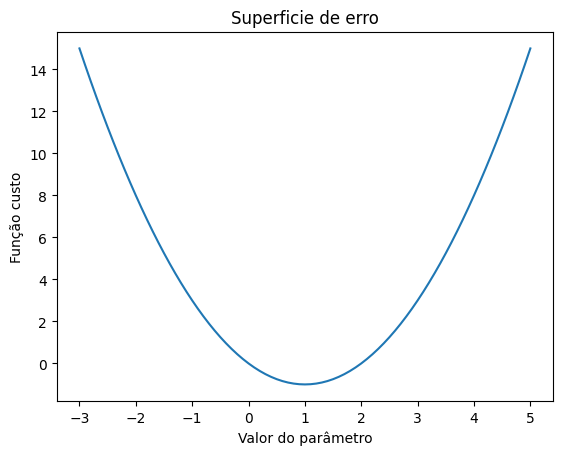

In [3]:
X_poly = np.linspace(-3, 5, 81)
print(X_poly[:5], '...', X_poly[-5:])
def cost_function(X):
    return X * (X-2)
y_poly = cost_function(X_poly)
plt.plot(X_poly, y_poly)
plt.xlabel('Valor do parâmetro')
plt.ylabel('Função custo')
plt.title('Superficie de erro')

##### 2. Crie uma função para o valor do gradiente. Ela será uma derivada analítica da função custo. Use essa função para avaliar o gradiente no ponto $x = 4.5$ e combine o resultado com a taxa de aprendizado para chegar ao próximo passo do processo de gradiente descendente.

In [5]:
def gradient(X):
    return (2*X) - 2
x_start = 4.5
learning_rate = 0.75
x_next = x_start - gradient(x_start)*learning_rate
x_next

-0.75

Esse é o próximo passo do gradiente descendente após $x = 4.5$.

##### 3. Plote o caminho do gradiente descendente, do ponto inicial ao próximo ponto, usando este código:

Text(0.5, 1.0, "['Superficíe de erro', 'Caminho do gradiente descendente']")

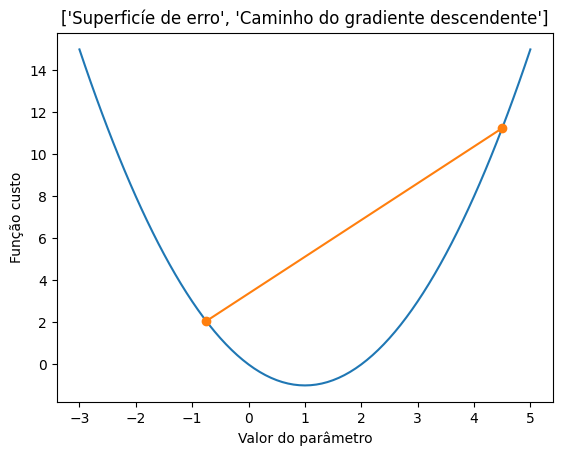

In [6]:
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)], '-o')
plt.xlabel('Valor do parâmetro')
plt.ylabel('Função custo')
plt.title(['Superficíe de erro', 'Caminho do gradiente descendente'])

Parece que demos um passo na direção certa. No entanto, está claro que "ultrapassamos" onde queríamos estar. Talvez nossa taxa de aprendizado seja grande demais e consequentemente também estamos dando passos muito grandes. Embora ajustar a taxa de aprendizado seja uma boa ideia para convergir-mos em direção a uma solução ótima rapidamente, nesse exemplo podemos apenas continuar ilustrando o resto do processo. Podemos precisar dar mais alguns passos. Na prática, o gradiente descendente continua até o tamanho dos passos ficar muito pequeno ou a alteração na função custo tornar-se bem menor (você pode especificar o quanto deseja que ela fique menor usando o argumento *tol* na regressão logística do scikit-learn), indicando que estamos "suficientemente próximos" de uma boa solução - isto é, de um **mínimo local** da função custo. Para esse exemplo, daremos um total de 14 passos, ou **iterações**, além do palpite inicial (observe que você também pode definir o número máximo de iterações no scikit-learn com *max_iter*).

##### 4. Execute 14 iterações para convergir em direção ao mínimo local da função custo usando o fragmento de código a seguir (repare que *iterations* é igual a 15, mas o endpoint não foi incluído na chamada a *range()*):

In [7]:
iterations = 15
x_path = np.empty(iterations,)
x_path[0] = x_start
for iteration_count in range(1, iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count - 1] - (derivative*learning_rate)
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

Pelos valores resultantes do processo de gradiente descendente, parece que (no final) chegamos muito perto (*1.00021362*) da solução ótima (*1*).

##### 5. Plote o caminho do gradiente descendente usando este código:

Text(0.5, 1.0, "['Superfície de erro', 'Caminho do gradiente descendente']")

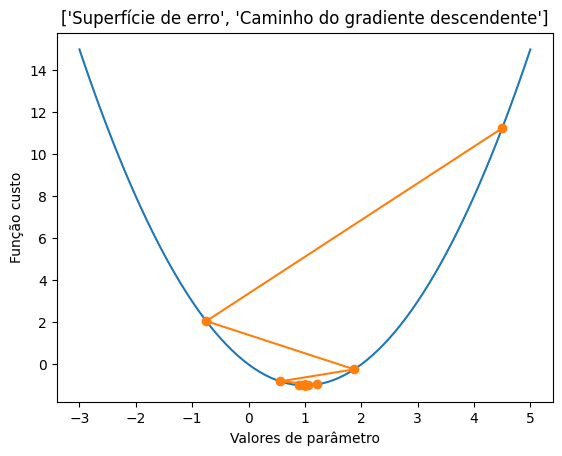

In [8]:
plt.plot(X_poly, y_poly)
plt.plot(x_path, cost_function(x_path), '-o')
plt.xlabel('Valores de parâmetro')
plt.ylabel('Função custo')
plt.title(['Superfície de erro', 'Caminho do gradiente descendente'])

Recomendamos que você repita o procedimento anterior com diferentes taxas de aprendizado para ver como elas afetam o caminho do gradiente descendente. Com a taxa de aprendizado certa, é possível convergir para uma solução altamente precisa com muita rapidez. Embora a escolha da taxa de aprendizado seja importante em diferentes aplicações de machine learning, para a regressão logística geralmente o problema é muito fácil de resolver e não é necessário selecionar uma taxa de aprendizado no scikit-learn.

À medida que você testou diferentes taxas de aprendizado, notou o que aconteceu quando a taxa era maior do que um? Nesse caso, o passo dado em direção à diminuição do erro é grande demais e acabamos obtendo um erro maior. Esse problema pode aumentar e levar o processo de gradiente para longe da região de erro mínimo. Por outro lado, se o tamanho do passo for pequeno demais, podemos demorar para encontrar a solução desejada.

---

### Exercício 17: Gerando e modelando dados de classificação sintéticos

Neste exercicio, observaremos o overfitting na prática usando um dataset sintético. Suponhamos que você tivesse recebido um dataset de classificação binária com muitas características candidatas (200) e não tivesse tempo para examinar todas individualmente. É possivel que algumas dessas caracteristicas estejam altamente correlacionadas ou tenham algum outro tipo de relação. No entanto, com a existencia de tantas variáveis, pode ser difícil explorar todas. Além disso, o dataset tem relativamente poucas amostras: apenas 1000. Geraremos esse dataset desafiador usando um recusro do scikit-learn que permite criar datasets sintéticos para explorações conceituais como essa. Execute as etapas a seguir para fazer o exercicio:

##### 1. Importe as classes *make_classification*, *train_test_split*, *LogisticRegression* e *roc_auc_score* usando este código:

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

Observe que primeiro importamos várias classes familiares do scikit-learn, além de uma nova que ainda não vimos: *make_classification*. Essa classe faz exatamente o que seu nome sugere - cria dados para um problema de classificação. Usando os diversos argumentos de palavras chaves, você pode especificar quantas amostras e características serão incluídas e quantas classes a variável de resposta terá. Também há um conjunto de outras opções que controlam com que "facilidade" resolveremos o problema.

##### 2. Gere um dataset com duas variáveis, x_synthetic e y_synthetic, 200 características candidatas e 1.000 amostras usando o código a seguir:

In [11]:
X_synthetic, y_synthetic = make_classification(n_samples=1000, n_features=200, n_informative=3, n_redundant=10, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=0.8, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=24)

##### 3. Examine a dimensão do dataset usando o seguinte código:

In [12]:
print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


Observe que geramos um dataset quase perfeitamente balanceado: com um equilibrio de classes próximo de 50/50. Também é importante notar que geramos todas as características de modo que elas tenham a mesma escala - isto é, uma média igual a 0 com desvio padrão 1. Certificar-se de que as características estejam na mesma escala, ou tenham aproximadamente o mesmo intervalo de valores, é um ponto-chave para o uso de métodos de regularização - e veremos por que posteriormente. Se as características de um dataset bruto estiverem em escalas muito diferentes, é aconselhavel normalizá-las para que fiquem na mesma escala. O scikit-learn tem uma funcionalidade que facilita isso; aprenderemos sobre ela na atividade do fim deste capítulo.

##### 4. Plote as primeiras características como histogramas para mostrar que o intervalo de valores é o mesmo usando o código a seguir:

/tmp/ipykernel_46176/320071236.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


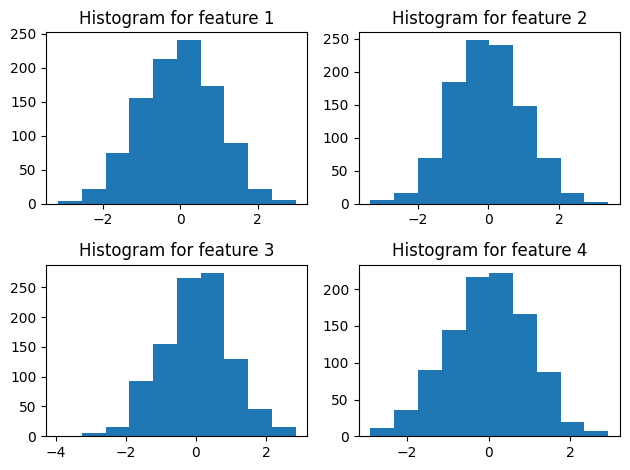

In [14]:
for plot_index in range(4):
    plt.subplot(2,2, plot_index+1)
    plt.hist(X_synthetic[:,plot_index])
    plt.title('Histogram for feature {}'.format(plot_index+1))
    plt.tight_layout()

Já que geramos esse dataset, não precisamos examinar diretamente todas as 200 características para verificar se elas estão na mesma escala. Logo, que preocupações teríamos com o dataset? Os dados estão balanceados em termos das frações de classes da variável de resposta, portanto, não precisamos diminuir ou aumentar as amostras, ou usar outros métodos úteis para dados desbalanceados. E quanto aos relacionamentos entre as características propriamente ditas e entre elas a variável de resposta? Há vários desses relacionamentos e é um desafio investigar todos diretamente. De acordo com nossa "regra prática", 200 características é um número excessivo (principalmente se usarmos a "regra de 10"). Temos 500 observações na classe mais rara, logo, por essa regra não devíamos ter mais de 50 características. É possível que com tantas características, das quais não temos uma boa ideia da qualidade o procedimento de treinamento do modelo cause overfitting.

##### 5. Divida os dados em conjuntos de treinamento e de teste usando uma razão de 80/20, e instancie um objeto de modelo de regressão logística com este código:

In [15]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=24)
lr_syn = LogisticRegression(solver='liblinear', penalty='l1', C=1000, random_state=1)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

Observe que estamos especificando algumas opções novas no modelo de regressão logística às quais até agora não demos atenção. Em primeiro lugar, especificamos o algumento *penalty* como **l1**. Isso significa que usaremos a **regularização L1**, que também é conhecida como **regularização lasso**. Discutiremos a definição matemática em breve. Em segundo lugar, repare que definimos o parâmetro C como igual a 1000. C é o "inverso da força de regularização", de acordo com a documentação do scikit-learn. Ou seja, valores maiores de C correspondem a menos regularização. Ao selecionar um número relativamente alto, estamos usando pouca regularização. O valor padrão de C é 1. Logo na verdade não estamos usando muita regularização aqui; e, vez disso, estamos simplesmente nos familizarizando com as opções de uso. Para concluir, estamos usando o solver *liblinear*, que já empregamos no passado. Embora estejamos utilizando dados na mesma escala, é bom ressaltar que, entre as diversas opções que temos disponíveis para solvers, *liblinear* é "robusto para dados de escalas diferentes". Além disso, liblinear é uma das duas únicas opções de solver que dão suporte à penalização L1 - a outra é saga.

##### 6. Ajuste o modelo de regressão logística com os dados de treinamento usando o código a seguir:

In [16]:
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

##### 7. Calcule o resultado do treinamento usando este código, primeiro obtendo as probabilidades previstas e depois encontrando a ROC AUC:

In [17]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.9420000000000001

##### 8. Calcule o resultado do teste da mesma maneira que o resultado do treinamento foi obtido:

In [18]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:, 1])

0.8075807580758075

A partir desses resultados, fica claro que o modelo de regressão logística sobreajustou os dados. Isto é, o resultado da ROC AUC com os dados de treinamento é substancialmente maior que o dos dados de teste.
 
---

### 18: Reduzindo o overfitting no problema de classificação de dados sintéticos

Este exercício é a continuação do *Exercício 17: gerando e modelando dados de classificação sintéticos*. Aqui, usaremos o procedimento de validação cruzada para encontrar um bom valor para o hiperparâmetro C. Faremos isso empregando apenas os dados de treinamento e reservando os dados de teste para depois que a construção do modelo for concluída. Prepare-se porque este será um longo exercício - mas mostraremos um procedimento geral que você poderá usar com vários tipos de modelos de machine learning, logo, o tempo gasto valerá a pena. Execute as etapas a seguir para fazer o exercício:

In [19]:
from sklearn.model_selection import StratifiedKFold, KFold

n_folds = 4
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)

##### 1. Altere o valor do parâmetro de regularização, C, para que ele varie de C = 1000 a C = 0.001. Você pode usar os fragmentos de código a seguir para fazê-lo

In [20]:
# Primeiro, defina expoentes, que serão potências de 10, como mostrado em:
C_val_exponents = np.linspace(3,-3, 13)
C_val_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [21]:
# Agora varie C de acordo com as potências de 10, desta forma:
C_vals = np.float64(10)**C_val_exponents
C_vals

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

Geralmente é uma boa ideia variar o parâmetro de regularização de acordo com potências de 10, ou usando uma estratégia semelhante, já que treinar modelos pode demorar muito, principalmente com a utilização da validação cruzada k-folds. Isso lhe dará uma boa noção de como um amplo intervalo de valores de C impacta no trade-off entre viés e variância, sem ser preciso treinar um número muito grande de modelos. Além das potências inteiras de 10, também incluímos pontos na escala de $log_{10}$ que aparecem no caminho intermediário.

##### 2. Importe a classe roc_curve:

In [22]:
from sklearn.metrics import roc_curve

Continuaremos a usar o resultado de ROC AUC para avaliar, treinar e testar o desempenho. agora que temos vários valores de C para testar e vários folds (nesse caso quatro) para a validação cruzada, queremos armazenar os resultados de treinamento e teste de cada fold e de cada valor de C.

##### 3. Defina uma função que receba o divisor da validação cruzada (k_folds), o array de valores de C (C_vals), o objeto de modelo (model), e as características e a variável de resposta (X e Y, respectivamente), como entradas, com as quais exploraremos diferentes níveis de regularização com a validação cruzada k-fols, usando o código a seguir

In [24]:
def cross_val_C_search(k_folds, C_vals, model, X, Y):

    # Etapa 4
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))

    # Etapa 5
    cv_test_roc = [[]]*len(C_vals)

    # Etapa 6
    for c_val_counter in range (len(C_vals)):
        #Define o valor de C para o objeto de modelo
        model.C = C_vals[c_val_counter]
        #Conta os folds para cara valor de C
        fold_counter = 0
    
        # Etapa 7
        for train_index, test_index in k_folds.split(X, Y):

            # Etapa 8
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            # Etapa 9
            model.fit(X_cv_train, y_cv_train)

            # Etapa 10
            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            # Etapa 11
            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            # Etapa 12
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            # Etapa 13
            fold_counter += 1

        # Etapa 14
        print('Done with C = {}'.format(lr_syn.C))
        
    # Etapa 15
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

> As etapas do código acima serão explicadas abaixo:

- 4. Crie um array NumPy para armazenar C_vals, com as dimensões n_folds por len(C_vals);

Em seguida, armazenaremos os arrays de limites e taxas de verdadeiros e falsos positivos que acompanham cada resultado da ROC AUC de teste em uma **lista de listas**.

- 5. Crie uma lista de listas vazias usando [[]] e *len(C_vals);

Usar *len(C_vals) implica que deve haver uma lista de tuplas com métricas (TPR, FPR, limites) para cada valor de C.

- 6. Crie um loop externo para treinar e testar cada um dos k folds para cada valor de ;

Podemos reutilizar o objeto de modelo que já temos e simplesmente definir um novo valor de C a cada execução do loop. Dentro do loop de valores de C, executaremos o loop de validação cruzada. Começaremos gerando os índices de linhas de dados de treinamento e teste para cada divisão.

- 7. Obtenha os índices de treinamento e teste de cada fold;

Agora os dados de treinamento do fold atual serão usados para treinar o modelo.

- 8. Indexe as características e a variável de resposta para obter os dados de treinamento e teste desse fold usando o código a seguir;

Agora os dados de treinamento do fold atual serão usados para treinar o modelo

- 9. Ajuste o modelo com os dados de treinamento, como mostrado em;

Isso "redefinirá" o modelo a partir de quaisquer que forem os coeficientes e a interceptação anteriores para refletir o treinamento com os dados novos

Os resultados da ROC AUC de treinamento e teste serão então obtidos, assim como os arrays de TPRs, FPRs e limites que acompanham os dados de teste.

- 10. Obtenha o resultado da ROC AUC de treinamento;

- 11. Obtenha o resultado da ROC AUC de teste;

- 12. Obtenha as curvas ROC de teste para cada fold usando o código a seguir;

Usaremos um contador para registrar o incremento dos folds, e, quando estivermos fora do loop de validação cruzada, exibiremos uma atualização de status na saída padrão. Ao executar procedimentos de processamento demorado, é uma boa ideia exibir periodicamente o status da tarefa para que você possa monitorar seu progresso e confirmar se tudo continua funcionado corretamente. provavelmente esse procedimento de validação cruzada só levará alguns segundos em seu laptop, mas para tarefas mais longas isso pode ser tranquilizador.

- 13. Incremente o contador de folds usando este código;

- 14. Escreva o código a seguir para mostrar o progresso da execução de cada valor de C;

- 15. Escreva o código a seguir que retornará as ROC AUCS e os dados da curva ROC e encerrará a função;

Continuaremos usando a divisão em três folds que mostramos anteriormente, mas recomendo que você teste esse procedimento com diferentes números de folds para comparar o efeito.

##### 16. Execute a função para procurar os valores de C que definimos, usando o modelo e os dados com os quais trabalhamos no exercício anterior e o código a seguir:

In [25]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search(k_folds, C_vals, lr_syn, X_syn_train, y_syn_train)

Done with C = 1000.0
Done with C = 316.22776601683796
Done with C = 100.0
Done with C = 31.622776601683793
Done with C = 10.0
Done with C = 3.1622776601683795
Done with C = 1.0
Done with C = 0.31622776601683794
Done with C = 0.1
Done with C = 0.03162277660168379
Done with C = 0.01
Done with C = 0.0031622776601683794
Done with C = 0.001


Qual será a aparência dos resultados da validação cruzada? Há algumas maneiras de examinarmos isso. É útili verificar o desempenho de cada fold individualmente para que você veja como os resultados variam.

Isso mostrará como os diferentes subconjuntos de dados se saem como conjuntos de teste, levando a uma ideia geral do nível de desempenho que pode ser esperado a partir do conjunto de teste desconhecido. Aqui queremos saber se podemos ou não usar a regularização para reduzir o overfitting que vimos. Sabemos que usar C = 1000 leva ao overfitting - sabermos diso porque comparamos os resultados de treinamento e teste. Porém, e quanto aos outros valores de C que testamos? Uma boa maneira de visualizar seria plotar os resultados de treinamento e teste no eixo y e os valores de C no eixo x

##### 17. Percorra cada fold para visualizar seus resultados individualmente usando o código a seguir:

Text(0.5, 1.0, 'Cross validation scores for each fold')

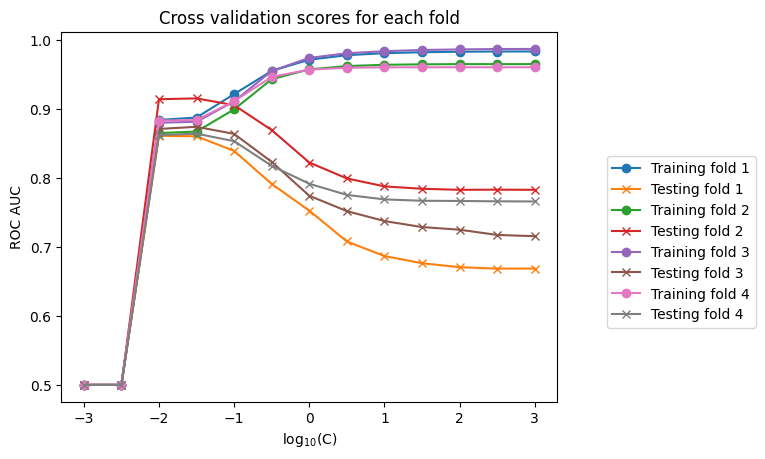

In [26]:
for this_fold in range(k_folds.n_splits):
    plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o', label='Training fold {}'.format(this_fold+1))
    plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x', label='Testing fold {}'.format(this_fold+1))

plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc = [1.1, 0.2])
plt.title('Cross validation scores for each fold')

Podemos ver que, à medida que C diminui para cada fold da validação cruzada, o desempenho do treinamento também diminui. No entanto, ao mesmo tempo que o desemprenho do teste aumenta. Para alguns folds e valores de C, na verdade o resultado da ROC AUC de teste excede o dos dados de treinamento, enquanto, para outros, essas duas métricas simplesmente se aproximam. Seja como for, podemos dizer que os valores de C iguais a $10^{-1.5}$ e $10^{-2}$ têm um desemprenho de teste semelhante, que é substancialmente mais alto que o de C = $10^3$. Logo parece que a regularização resolveu com sucesso nosso problema de overfitting

No entanto, e quanto aos valores mais baixos de C? Para valores menores que $10^{-1.5}$, a métrica ROC AUC cai repentinamente para 0.5. Como você sabe, esse valor significa que o modelo de classificação é basicamente inútil, com um desempenho que não é melhor que o lançamento de uma moeda. Recomendo que você verifique isso posteriormente ao examinar como a regularização afeta os valores dos coeficientes; de qualquer forma, é isso que acontece quando é aplicada uma regularização L1 em um nível tão alto a ponto de todos os coeficientes do modelo serem reduzidos a 0. É claro que esses modelos não são úteis para nós.

É útil examinar o desempenho de treinamento e teste de cada divisão da validação k-folds para conhecermos a variabilidade esperada no desempenho do modelo quandp ele é avaliado com dados novos desconhecidos. Porém, para resumir os resultados do procedimento k-folds, uma abordagem comum é calcular a média da métrica de desempenho dos folds para cada valor do hiperparâmetro que esta sendo considerado. Faremos isso na próxima etapa

##### 18. Plote a média de resultados da ROC AUC de treinamento e teste para cada valor de C usando o código a seguir:

Text(0.5, 1.0, 'Cross validation scores averaged over all folds')

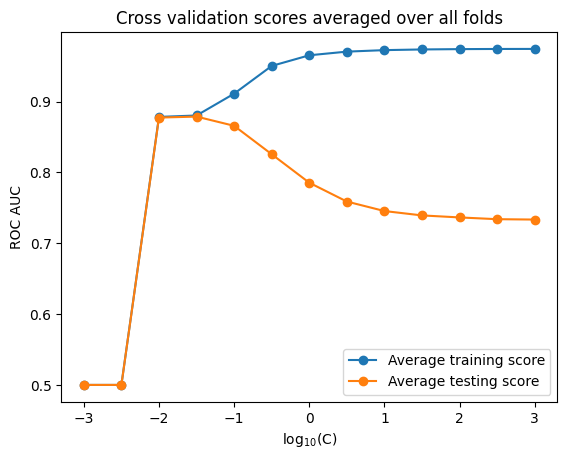

In [27]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o', label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-o', label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation scores averaged over all folds')

Nessa plotagem, fica claro que $C = 10^{-1.5}$ e $10^{-2}$ são os melhores valores para C. Há pouco ou nenhum overfitting aqui, já que os resultados da média de treinamento e teste são quase iguais. Você poderia pesquisar em uma grade de valores mais refinados (isto é, C = $10^{-1.1}$, $10^{-1.2}$ e assim por diante) para localizar com maior precisão de um valor de C. No entanto em nosso gráfico podemos ver que provavelmente C = $10^{-1.5}$ ou C = $10^{-2}$ serão boas soluções. Daremos continuidade com C = $10^{-1.5}$.

Examinar a síntese da métrica ROC AUC é uma boa maneira de termos uma ideia rápida de como os modelos se sairão. Porém, para qualquer aplicação empresarial do mundo real, com frequência temos de selecionar um limite específico que acompanhe as taxas de verdadeiros e falsos positivos. Isso é necessário para usarmos o classificador e tomar a obrigatória decisão "sim" ou "não", que no nosso estudo de caso é uma previsão de se uma conta ficará ou não inadimplente. Portanto, é útil examinar as curvas ROC dos diferentes folds da validação cruzada. Para facilitar isso, a função anterior foi projetada para retornar as taxas de verdadeiros e falsos positivos, e os limites, de cada fold de teste e valor de C, na lista de listas cv_test_roc. Primeiro, temos de encontrar o índice da lista externa que corresponde ao valor de C que selecionamos, $10^{-1.5}$.

Para encontrá-lo, poderíamos apenas examinar nossa lista de valores de C e fazer a contagem manualmente, porém é mais seguro fazê-lo programaticamente encontrando o índice do elemento diferente de zero de um array booleano como mostrado na próxima etapa.

##### 19. Use um array booleano para encontrar um índice em que C = $10^{-1.5}$ e converta-o para um tipo de dado inteiro com este código:

In [28]:
best_C_val_bool = C_val_exponents == -1.5
best_C_val_bool.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

##### 20. Converta a versão de tipo inteiro do array booleano em um único índice inteiro usando a função nonzero com o código a seguir:

In [29]:
best_C_val_ix = np.nonzero(best_C_val_bool.astype(int))
best_C_val_ix[0][0]

9

##### 21. Acesse as taxas de verdadeiros e falsos positivos para plotar as curvas ROC de cada fold:

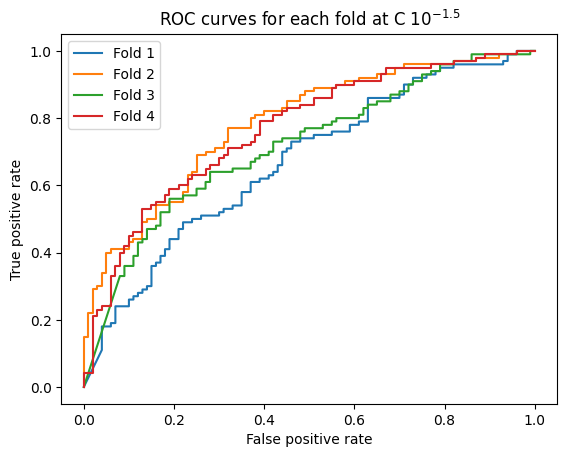

In [30]:
for this_fold in range(n_folds):
    fpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][0]
    tpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][1]
    plt.plot(fpr, tpr, label='Fold {}'.format(this_fold+1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for each fold at C $10^{-1.5}$')
plt.legend()

Parece que há bastante variabilidade nas curvas ROC. Por exemplo, se por alguma razão limitarmos a taxa de falsos positivos a 40%, então pela plotagem parece que talvez possamos atingir uma taxa de verdadeiros positos de aproximadamente 65% a 80%. Você pode encontrar os valores exatos examinando os arrays que plotamos. Isso lhe dará uma ideia de quanta variabilidade pode ser esperada do desempenho na implantação do modelo com novos dados. Geralmente, qunato maior o número de dados de treinamento disponíveis, menor é a variabilidade entre os folds da validação cruzada, logo esse também pode ser um sinal de que seria bom coletar dados adicionais, principalmente se a variabilidade entre os folds de treinamento parecer alta. Se quiser, faça testes também com diferentes números de folds usando esse procedimento para ver o efeito sobre a variabilidade de resultados entre folds.

Normalmente faríamos testes com outros modelos em nosso problema de dados sintéticos, como uma floresta aleatória ou uma máquina de vetores de suporte, mas como na validação cruzada a regressão logística provou ser o melhor modelo, vamos torná-la nossa opção final. Qunado o modelo final tiver sido selecionado, todos os dados de treinamento poderão ser usados no seu ajuste com os hiperparâmetros escolhidos com a validação cruzada. É recomendável usar o maior número de dados possível no ajuste do modelo, já que geralmente os modelos funcionam melhor qunado treinados com mais dados.

##### 22. Treine a regressão logística com todos os dados de treinamento de nosso problema sintético e compare os resultados de treinamento e teste, usando o conjunto reservado para teste como mostrado nas etapas a seguir.

> **Nota:** Esta é a última etapa do processo de seleção do modelo. Você só deve usar o conjunto de teste desconhecido após sua busca do modelo e dos hiperparâmetros terminar, caso contrário ele não sera "desconhecido".

##### 23. Defina o valor de C e treine o modelo com todos os dados de treinamento usando este código:

In [31]:
lr_syn.C = 10**(-1.5)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=0.03162277660168379, penalty='l1', random_state=1,
                   solver='liblinear')

##### 24. Obtenha as probabilidades previstas e o resultado da ROC AUC para os dados de treinamento com este código:

In [32]:
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.8802812499999999

##### 25. Obtenha as probabilidades previstas e o resultado da ROC AUC para os dados de teste com este código:

In [33]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8847884788478848

Podemos ver que, com o uso da regularização, os resultados de treinamento e teste do modelo são semelhantes, indicando que o problema do overfitting foi resolvido. O resultado do treinamento é mais baixo, já que introduzimos viés no modelo para compensar a variância. No entanto, não há problema ja que o resultado do teste, que é a parte mais importante, é mais alto. O resultado do teste fora da amostra é o que importa para a capacidade preditiva. Recomendo que você verifique se esses resultados de treinamento e teste são semelhantes aos do procedimento de validação cruzada exibindo os valores dos arrays que plotamos posteriormente; verá que eles são semelhantes

> **Nota:** No mundo real, antes de distribuir esse modelo para seu cliente para uso na produção, provavelmente você o treinaria com todos os dados que recebeu, inclusive o conjunto de teste desconhecido. Esse comportamento se baseia novamente na ideia de que, quanto maior o número de dados que um modelo vê, melhor deve ser seu desempenho na prática.

Sabemos que a regularização L1 funciona diminuindo a magnitude (isto é, o valor absoluto) dos coeficientes da regressão logístiva. Ela também configura alguns coeficientes com zero, executando assim a seleção de características. Na próxima etapa, determinaremos quantos coeficientes foram configurados com zero.

##### 26. Acesse os coeficientes do modelo treinado e determine quantos não são iguais a zero com este código:

In [34]:
sum((lr_syn.coef_ != 0)[0])

2

O código usa a soma de um array booleano para indicar onde ficam localizados os coeficientes diferentes de zero, logo, ele exibe quantos coeficientes do modelo não foram configurados com zero pela regularização L1. Só 2 das 200 características foram selecionadas!

##### 27. Examine o valor da intercepetação usando o código a seguir:

In [35]:
lr_syn.intercept_

array([0.])

Ela mostra que a interceptação foi regularizada com zero.

Neste exercicio, atingimos vários objetivos. Usamos o procedimento de validação cruzada k-folds para ajustar o hiperparâmetro de regularização. Vimos o poder da regularização na redução do overfitting, e, no caso da regularização L1 na regressão logística, a seleção de características.

---

### Atividade 4: Validação cruzada e engenharia de características com os dados do estudo de caso

Nesta atividade, aplicaremos o conhecimento de validação cruzada e regularização que obtivemos neste capítulo aos dados do estudo de caso. Executaremos uma engenharia de características básica. Para estimar parâmetros para o modelo de regressão logística regularizado dos dados do estudo de caso, que têm tamanho maior do que os dados sintéticos com os quais trabalhamos, usaremos o solver *saga*. Para utilizar esse solver, e para fins de regularização, teremos de **escalonar** nossos dados como parte do processo de modelagem o que nos levará a usar os *Pipelines* do scikit-learn. Quando você terminar a atividade terá obtido um desempenho de teste de validação cruzada melhor com o uso de características de interação.

##### 1. Selecione as características no DataFrame dos dados do estudo de caso.

Você pode usar a lista de nomes de características que criamos neste capítulo. No entanto, certifique-se de não incluir a variável de resposta, que seria uma característica muito boa (mas totalmente inapropriada!)

In [36]:
features = features_response[:-1]
X = df[features].values

NameError: name 'features_reponse' is not defined

##### 2. Crie uma divisão de treinamento/teste usando um seed aleatório igual a 24.

Usaremos essa divisão ao avançar e reservaremos os dados de teste como o conjunto de teste desconhecido. Dessa forma, poderemos criar facilmente notebooks separados com outas abordagens de modelagem, usando os mesmos dados de treinamento.

##### 3. Instancie *MinMaxScaler* para escalonar os dados.

##### 4. Instancie um modelo de regressão logística com o solver *saga* e a penalização L1, e configure *max_iter* com 1.000 já que queremos que o solver tenha interações suficientes para encontrar uma boa solução.

##### 5. Importe a classe *Pipeline* e crie um *Pipeline* com o escalonador e o modelo de regressão logística, usando os nomes *'scaler'* e *'model'* para as etapas respectivamente.

##### 6. Use os métodos *get_params* e *set_params* para visualizar os parâmetros de cada estágio do pipeline e alterá-los.

##### 7. Crie um intervalo menor de valores de *C* para tester com a validação cruzada, já que esses modelos demandarão mais tempo para serem treinados e testados com mais dados do que nossos exercícios anteriores; recomendamos $C = [10², 10, 1, 10^{-1}, 10^{-2}, 10^{-3}]$.

##### 8. Crie uma nova versão da função *cross_val_C_search*, chamada *cross_val_C_search_pipe*. Em vez do argumento *model*, essa função receberá um argumento *pipeline*. As alterações na função serão a definição do valor de *C* com o uso de *set_params(model__C = <valor que você quiser testar>)* no pipeline, a substituição do modelo pelo pipeline para os métodos *fit* e *predict_proba* e o acesso ao valor de *C* com o uso de *pipeline.get_params()['model__C'] para a atualização do status exibido.

##### 9. Execute essa função como no exercício anterior, mas usando o novo intervalo de valores de *C*, o ppipeline que você criou e as características e a variável de resposta da divisão de treinamento dos dados do estudo de caso.

Você pode ver avisos aqui, ou em etapas posteriores, sobre a não convergência do solver; poderíamos tentar usar as opções *tol* ou *max_iter* para chegar à convergência, mas os resultados obtidos com *max_iter = 1000* devem ser suficienter.

##### 10. Plote a ROC AUC da média de treinamento e teste entre os folds para cada valor de *C*

##### 11. Crie características de interação para os dados do estudo de caso e confirme se o número de características novas faz sentido.

##### 12. Repita o procedimento de validação cruzada e observe o desempenho do modelo agora.

Levaremos mais tempo devido ao número maior de características, mas provavelmente serão apenas alguns minutos. Você acha que o desempenho médio do teste de validação cruzada melhorou com as características de interação? A regularização foi útil?